# Sharpe Quotient und Portfoliowerte

In [43]:
import pandas as pd

In [44]:
import quandl

## Ein Portfolio erstellen

In [45]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [46]:
quandl.ApiConfig.api_key = "YovE679j_DPTFFAWusBD"

In [47]:
# Wir erfassen ein paar Technologie Aktien für unser Portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [48]:
# Alternative
# aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
# cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
# ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
# amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [49]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

## Preise normalisieren

Das ist dasselbe wie die gesamten täglichen Renditewerte (cumulative daily returns).

In [50]:
# Beispiel
aapl.iloc[0]['Adj. Close']

52.848786580038

In [51]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [52]:
aapl.head()

Adj. Close  Normed Return
Date                                 
2012-01-03   52.848787       1.000000
2012-01-04   53.132802       1.005374
2012-01-05   53.722681       1.016536
2012-01-06   54.284287       1.027162
2012-01-09   54.198183       1.025533

In [13]:
aapl.tail()

Adj. Close  Normed Return
Date                                 
2016-12-23  115.547742       2.177549
2016-12-27  116.281568       2.191378
2016-12-28  115.785740       2.182034
2016-12-29  115.755990       2.181473
2016-12-30  114.853583       2.164467

## Allokationen

Mal angenommen, wir hätten die folgenden Allokationen für unser gesamtes Portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Reflektieren wir diese Werte, indem wir unsere normierte Rendite (Normed Return) mit unseren Allokationen multiplizieren.

In [14]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [15]:
aapl.head()

Adj. Close  Normed Return  Allocation
Date                                             
2012-01-03   53.063218       1.000000    0.300000
2012-01-04   53.348386       1.005374    0.301612
2012-01-05   53.940658       1.016536    0.304961
2012-01-06   54.504543       1.027162    0.308149
2012-01-09   54.418089       1.025533    0.307660

## Investition (Investment)

Nehmen wir an, wir würden eine Millionen Dollar in dieses Portfolio investieren.

In [16]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Gesamter Portfoliowert  (Total Portfolio Value)

In [17]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [18]:
portfolio_val.head()

Position Values  Position Values  Position Values  Position Values
Date                                                                          
2012-01-03    300000.000000    200000.000000    400000.000000    100000.000000
2012-01-04    301612.236461    203864.734300    398368.223296     99150.980283
2012-01-05    304960.727573    203113.258186    396478.797638     99206.836843
2012-01-06    308148.724558    202361.782072    391926.999463    101999.664861
2012-01-09    307659.946988    203650.026838    389887.278583     99737.474166

In [19]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [20]:
portfolio_val.head()

AAPL Pos      CISCO Pos        IBM Pos       AMZN Pos
Date                                                                  
2012-01-03  300000.000000  200000.000000  400000.000000  100000.000000
2012-01-04  301612.236461  203864.734300  398368.223296   99150.980283
2012-01-05  304960.727573  203113.258186  396478.797638   99206.836843
2012-01-06  308148.724558  202361.782072  391926.999463  101999.664861
2012-01-09  307659.946988  203650.026838  389887.278583   99737.474166

In [21]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [22]:
portfolio_val.head()

AAPL Pos      CISCO Pos        IBM Pos       AMZN Pos  \
Date                                                                     
2012-01-03  300000.000000  200000.000000  400000.000000  100000.000000   
2012-01-04  301612.236461  203864.734300  398368.223296   99150.980283   
2012-01-05  304960.727573  203113.258186  396478.797638   99206.836843   
2012-01-06  308148.724558  202361.782072  391926.999463  101999.664861   
2012-01-09  307659.946988  203650.026838  389887.278583   99737.474166   

               Total Pos  
Date                      
2012-01-03  1.000000e+06  
2012-01-04  1.002996e+06  
2012-01-05  1.003760e+06  
2012-01-06  1.004437e+06  
2012-01-09  1.000935e+06

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

Text(0.5,1,'Total Portfolio Value')

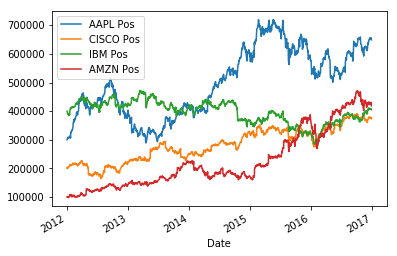

In [25]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [26]:
portfolio_val.tail()

AAPL Pos      CISCO Pos        IBM Pos       AMZN Pos  \
Date                                                                     
2016-12-23  653264.617079  377469.015679  407359.955612  424839.412389   
2016-12-27  657413.396830  379323.596496  408410.671112  430877.506563   
2016-12-28  654610.167268  376108.989746  406089.322915  431285.259454   
2016-12-29  654441.973495  376603.544631  407091.167926  427386.471541   
2016-12-30  649340.095692  373636.215323  405600.618032  418851.589119   

               Total Pos  
Date                      
2016-12-23  1.862933e+06  
2016-12-27  1.876025e+06  
2016-12-28  1.868094e+06  
2016-12-29  1.865523e+06  
2016-12-30  1.847429e+06

# Portfolio Statistiken
### Tägliche Rendite

In [27]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Gesamtrendite

In [28]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 84.74285181665459 was percent!


### Durchschnittliche tägliche Rendite

In [29]:
portfolio_val['Daily Return'].mean()

0.0005442330716215279

### Standardabweichung tägliche Rendite

In [30]:
portfolio_val['Daily Return'].std()

0.010568287769162557

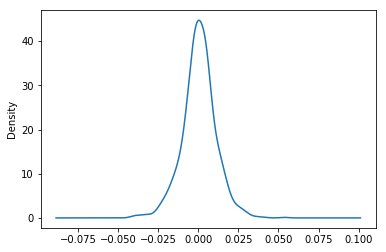

In [31]:
portfolio_val['Daily Return'].plot(kind='kde')

# Sharpe Quotient (Sharpe Ratio)

Der Sharpe Quotient ist ein Maß zur Berechnung von Risiko-angepasster Rendite. Dieser Quotient ist Industriestandard für solche Berechnungen geworden. 

Sharpe Quotient = (Durschnittliche Rendite des Portfolios - risikofreie Quote) / Standardabweichung der Rendite des Portfolios

Der originale Sharpe Quotient

Jährlicher Sharpe Quotient = K-Wert * SQ

K-Werte für verschiedene Probenhäufigkeiten:

* Täglich = sqrt(252)
* Wöchentlich= sqrt(52)
* Monatlich = sqrt(12)

In der EU verwendet man eine sehr niedrige risikofreie Quote (die Quote, die Du bekommen würdest, wenn du Dein Geld einfach in einer Bank lassen würdest, ist in der EU zur Zeit sehr niedrig, sagen wir ~ 0% Zinsen). Falls Du in einem anderen Land mit höheren Quoten für deine Handelswährung lebst, kannst Du diesen Trick benutzen, um eine jährliche Quote in eine tägliche Quote umzuwandeln:

tägliche_quote = ((1.0 + jährliche_quote)**(1/252))-1

Andere Werte, die Leute benutzen, sind Sachen wie 3-monatige Staatsanleihen oder [LIBOR](http://www.investopedia.com/terms/l/libor.asp) / EURIBOR.

Lies mehr dazu: [Sharpe Quotient](http://www.investopedia.com/terms/s/sharperatio)

In [32]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [33]:
SR

0.05149680662647716

In [34]:
ASR = (252**0.5)*SR

In [35]:
ASR

0.81748646188585

In [36]:
portfolio_val['Daily Return'].std()

0.010568287769162557

In [37]:
portfolio_val['Daily Return'].mean()

0.0005442330716215279

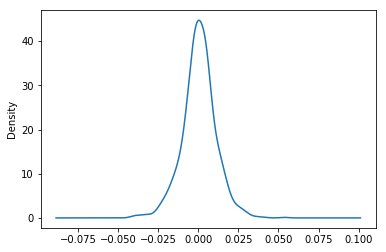

In [38]:
portfolio_val['Daily Return'].plot('kde')

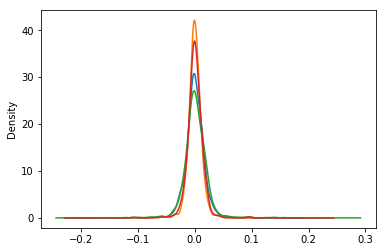

In [39]:
aapl['Adj. Close'].pct_change(1).plot('kde')
ibm['Adj. Close'].pct_change(1).plot('kde')
amzn['Adj. Close'].pct_change(1).plot('kde')
cisco['Adj. Close'].pct_change(1).plot('kde')

In [40]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

# Super gemacht!